In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [2]:
df_train = pd.read_excel("assets/data_split.xlsx", 'train_45').sample(frac=1)
df_train.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
11,12,0.7338,0.7311,0.7273,0.7342,0.7394,0.7555,0.7692,0.7718,0.7592,...,0.0070,0.0067,0.0064,0.0064,0.0066,0.0067,0.0067,0.0069,HG03,0
4,5,0.6483,0.6339,0.6206,0.6254,0.6411,0.6602,0.6608,0.6632,0.6680,...,-0.0040,-0.0038,-0.0039,-0.0039,-0.0040,-0.0039,-0.0038,-0.0035,GL01,0
37,38,0.7076,0.6937,0.6870,0.6903,0.7114,0.7295,0.7236,0.7209,0.7051,...,-0.0098,-0.0098,-0.0096,-0.0096,-0.0097,-0.0097,-0.0095,-0.0092,VFRESH 02,1
9,10,0.6308,0.5983,0.5811,0.6055,0.6114,0.6360,0.6398,0.6260,0.6432,...,0.0028,0.0025,0.0023,0.0026,0.0027,0.0027,0.0028,0.0030,HD01,0
35,36,0.4196,0.4279,0.4266,0.4276,0.4386,0.4342,0.4337,0.4403,0.4507,...,-0.0025,-0.0030,-0.0033,-0.0032,-0.0031,-0.0033,-0.0032,-0.0031,TM 05,1


In [3]:
df_test = pd.read_excel("assets/data_split.xlsx", 'test').sample(frac=1)
df_test.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
4,5,0.7681,0.7654,0.7774,0.7938,0.7967,0.8009,0.7939,0.8121,0.8240,...,0.0079,0.0078,0.0079,0.0080,0.0079,0.0079,0.0083,0.0086,HamY06,0
12,13,0.5238,0.5401,0.5450,0.5406,0.5536,0.5561,0.5549,0.5697,0.5842,...,-0.0068,-0.0065,-0.0065,-0.0068,-0.0069,-0.0068,-0.0065,-0.0062,THTM 04,1
8,9,0.5940,0.6032,0.6025,0.6016,0.6185,0.6168,0.6141,0.6174,0.6139,...,-0.0014,-0.0015,-0.0018,-0.0020,-0.0019,-0.0019,-0.0018,-0.0015,VFRESH 01,1
11,12,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,...,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260,FANTA,1
0,1,0.6308,0.5983,0.5811,0.6055,0.6114,0.6360,0.6398,0.6260,0.6432,...,0.0028,0.0025,0.0023,0.0026,0.0027,0.0027,0.0028,0.0030,HamY02,0


In [4]:
df_validate = pd.read_excel("assets/data_split.xlsx", 'validate').sample(frac=1)
df_validate.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
0,6,0.6041,0.5992,0.5847,0.6007,0.6337,0.6228,0.6201,0.6239,0.6475,...,-0.0024,-0.0026,-0.0025,-0.0024,-0.0025,-0.0025,-0.0023,-0.0021,GL02,0
1,10,0.5924,0.5965,0.5997,0.5998,0.5952,0.5929,0.6076,0.6153,0.6029,...,0.0097,0.0093,0.0092,0.0095,0.0094,0.0091,0.0095,0.0098,HamY04,0
2,48,0.2276,0.2291,0.2273,0.2340,0.2429,0.2332,0.2331,0.2513,0.2636,...,-0.0039,-0.0041,-0.0042,-0.0041,-0.0041,-0.0040,-0.0039,-0.0038,FANTA 04,1
3,35,0.5578,0.5710,0.5544,0.5391,0.5574,0.5698,0.5667,0.5744,0.5862,...,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0084,-0.0082,THTM 05,1
4,42,0.5732,0.5820,0.5904,0.5946,0.6068,0.6257,0.6331,0.6259,0.6349,...,-0.0010,-0.0013,-0.0017,-0.0016,-0.0013,-0.0012,-0.0013,-0.0010,VFRESH 03,1


In [5]:
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]
y_validate = df_validate.iloc[:, -1]
y_validate

0    0
1    0
2    1
3    1
4    1
Name: encode, dtype: int64

In [6]:
X_train = df_train.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_test = df_test.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_validate = df_validate.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_validate

,190,191,192,193,194,195,196,197,198,199,...,791,792,793,794,795,796,797,798,799,800
0,0.6041,0.5992,0.5847,0.6007,0.6337,0.6228,0.6201,0.6239,0.6475,0.6650,...,-0.0025,-0.0023,-0.0024,-0.0026,-0.0025,-0.0024,-0.0025,-0.0025,-0.0023,-0.0021
1,0.5924,0.5965,0.5997,0.5998,0.5952,0.5929,0.6076,0.6153,0.6029,0.6228,...,0.0092,0.0096,0.0097,0.0093,0.0092,0.0095,0.0094,0.0091,0.0095,0.0098
2,0.2276,0.2291,0.2273,0.2340,0.2429,0.2332,0.2331,0.2513,0.2636,0.2614,...,-0.0041,-0.0039,-0.0039,-0.0041,-0.0042,-0.0041,-0.0041,-0.0040,-0.0039,-0.0038
3,0.5578,0.5710,0.5544,0.5391,0.5574,0.5698,0.5667,0.5744,0.5862,0.6030,...,-0.0085,-0.0086,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0084,-0.0082
4,0.5732,0.5820,0.5904,0.5946,0.6068,0.6257,0.6331,0.6259,0.6349,0.6484,...,-0.0014,-0.0012,-0.0010,-0.0013,-0.0017,-0.0016,-0.0013,-0.0012,-0.0013,-0.0010


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)

In [8]:
n_components = 6
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_validate_pca = pca.transform(X_validate_scaled)

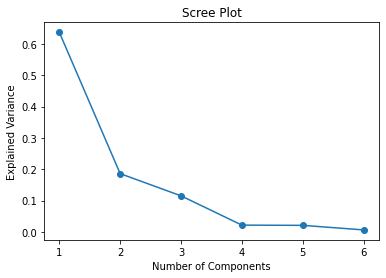

In [9]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

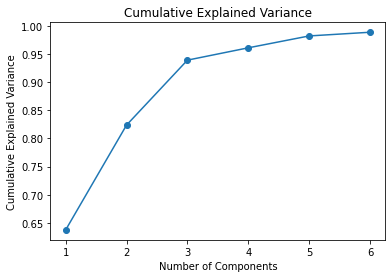

In [10]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train_pca, y_train)
LR.predict(X_test_pca)
LR.score(X_test_pca, y_test)

0.9230769230769231

In [12]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(n_components,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])
optimizer=SGD(lr=1e-3, momentum=0.9, decay=1e-2/500)
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=200, batch_size=4, validation_data=(X_validate_pca, y_validate))

Epoch 1/200


c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 12ms/step - loss: 1.4861 - accuracy: 0.4889 - val_loss: 2.0338 - val_accuracy: 0.4000
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 1.3123 - accuracy: 0.5111 - val_loss: 1.8461 - val_accuracy: 0.4000
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 1.1721 - accuracy: 0.5556 - val_loss: 1.6914 - val_accuracy: 0.2000
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 1.0443 - accuracy: 0.5556 - val_loss: 1.5726 - val_accuracy: 0.4000
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.9462 - accuracy: 0.6667 - val_loss: 1.4530 - val_accuracy: 0.4000
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0.8663 - accuracy: 0.6444 - val_loss: 1.3441 - val_accuracy: 0.4000
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7898 - accuracy: 0.6444 - val_loss: 1.2578 - val_accuracy: 0.4000
Epoch 8/200
12/12 [=====

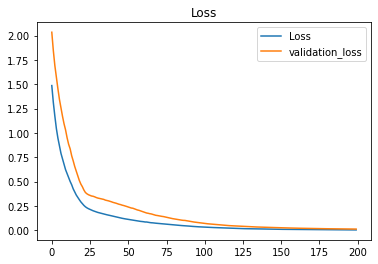

In [13]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.title("Loss")
plt.show()

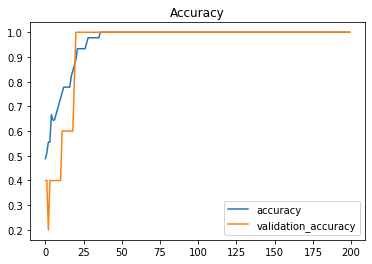

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
y_pred = model.predict(X_test_pca)
y_pred[y_pred > 0.5] = 1 
y_pred[y_pred <= 0.5] = 0 

pred_df = pd.DataFrame(y_pred, columns=["Predict"])
test_df = pd.DataFrame(y_test.values, columns=["Test"])
final_df = pd.concat([pred_df, test_df], axis=1)
final_df

1/1 [==============================] - 0s 54ms/step


,Predict,Test
0,0.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,0.0,0
5,1.0,1
6,0.0,0
7,1.0,1
8,1.0,1
9,1.0,1


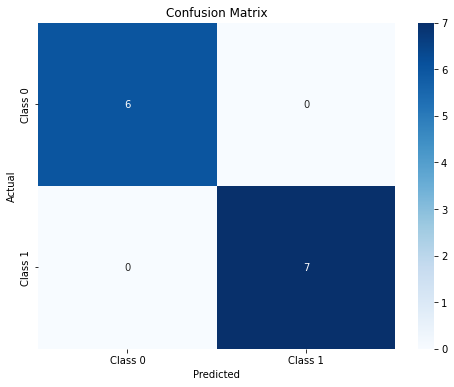

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels if applicable
class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy:  1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
